In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pdb
import numpy as np
from math import sqrt


## source code = https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/samples_generator.py

## Generated datasets for classification and clustering

#### general config

In [2]:
NUM_SAMPLES = 5000
N_BINS      = 4
CENTERS     = [(-5, -5), (0, 0), (5, 5), (7, 7)] 

### make_blobs

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=NUM_SAMPLES, n_features=2, cluster_std=1.0,
                  centers=CENTERS, shuffle=False, random_state=42)

In [4]:
X.shape

(5000, 2)

In [5]:
y.shape

(5000,)

In [6]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
np.bincount(y)

array([1250, 1250, 1250, 1250])

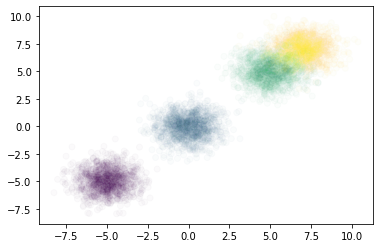

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.02)

In [9]:
X, y = make_blobs(n_samples=[500, 1000, 5000, 1000], n_features=2, cluster_std=1.0,
                  centers=CENTERS, shuffle=False, random_state=42)

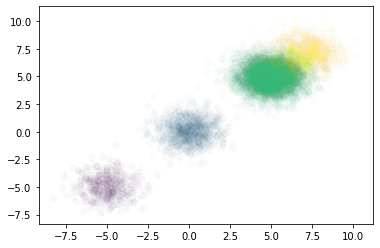

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.02)

## Exercise: adjust the standard deviation of the clusters

In [11]:
X, y = make_blobs(n_samples=[500, 1000, 5000, 1000], n_features=2, cluster_std=[1.0, 5.0, 0.5, 1.0],
                  centers=CENTERS, shuffle=False, random_state=42)

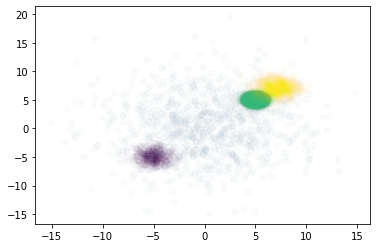

In [12]:
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.02)

## make_blob source code

In [13]:
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/samples_generator.py
def make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0,
               center_box=(-10.0, 10.0), shuffle=True, random_state=None):
    """Generate isotropic Gaussian blobs for clustering.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    n_features : int, optional (default=2)
        The number of features for each sample.
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers must be
        either None or an array of length equal to the length of n_samples.
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers are
        generated at random.
    shuffle : boolean, optional (default=True)
        Shuffle the samples.
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : array of shape [n_samples, n_features]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    Examples
    --------
    >>> from sklearn.datasets.samples_generator import make_blobs
    >>> X, y = make_blobs(n_samples=10, centers=3, n_features=2,
    ...                   random_state=0)
    >>> print(X.shape)
    (10, 2)
    >>> y
    array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])
    >>> X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
    ...                   random_state=0)
    >>> print(X.shape)
    (10, 2)
    >>> y
    array([0, 1, 2, 0, 2, 2, 2, 1, 1, 0])
    See also
    --------
    make_classification: a more intricate variant
    """
    generator = check_random_state(random_state)

    if isinstance(n_samples, numbers.Integral):
        # Set n_centers by looking at centers arg
        if centers is None:
            centers = 3

        if isinstance(centers, numbers.Integral):
            n_centers = centers
            centers = generator.uniform(center_box[0], center_box[1],
                                        size=(n_centers, n_features))

        else:
            centers = check_array(centers)
            n_features = centers.shape[1]
            n_centers = centers.shape[0]

    else:
        # Set n_centers by looking at [n_samples] arg
        n_centers = len(n_samples)
        if centers is None:
            centers = generator.uniform(center_box[0], center_box[1],
                                        size=(n_centers, n_features))
        try:
            assert len(centers) == n_centers
        except TypeError:
            raise ValueError("Parameter `centers` must be array-like. "
                             "Got {!r} instead".format(centers))
        except AssertionError:
            raise ValueError("Length of `n_samples` not consistent"
                             " with number of centers. Got n_samples = {} "
                             "and centers = {}".format(n_samples, centers))
        else:
            centers = check_array(centers)
            n_features = centers.shape[1]

    # stds: if cluster_std is given as list, it must be consistent
    # with the n_centers
    if (hasattr(cluster_std, "__len__") and len(cluster_std) != n_centers):
        raise ValueError("Length of `clusters_std` not consistent with "
                         "number of centers. Got centers = {} "
                         "and cluster_std = {}".format(centers, cluster_std))

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.full(len(centers), cluster_std)

    X = []
    y = []

    if isinstance(n_samples, Iterable):
        n_samples_per_center = n_samples
    else:
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers

        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(generator.normal(loc=centers[i], scale=std,
                                  size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)

    if shuffle:
        total_n_samples = np.sum(n_samples)
        indices = np.arange(total_n_samples)
        generator.shuffle(indices)
        X = X[indices]
        y = y[indices]

    return X, y


## make classification

In [14]:
# make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, 
#                     weights=None, flip_y=0.01, class_sep=1.0, 
#                     hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)[source]

from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state = 21)

In [15]:
X.shape

(100, 4)

In [16]:
np.bincount(y)

array([50, 50])

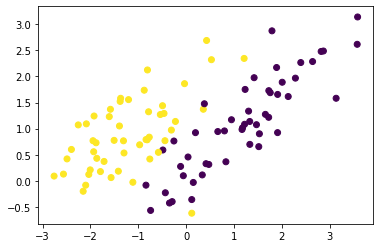

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = y)

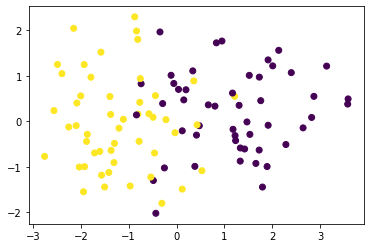

In [18]:
plt.scatter(X[:, 0], X[:, 2], c = y)

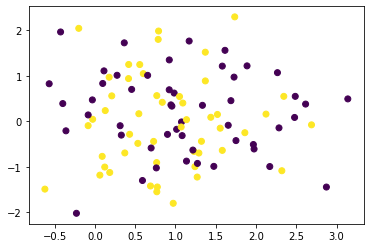

In [19]:
plt.scatter(X[:, 1], X[:, 2], c = y)

## source code

In [20]:
from sklearn.utils import check_random_state
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle as util_shuffle

def _generate_hypercube(samples, dimensions, rng):
    """Returns distinct binary samples of length dimensions
    """
    if dimensions > 30:
        return np.hstack([rng.randint(2, size=(samples, dimensions - 30)),
                          _generate_hypercube(samples, 30, rng)])
    #pdb.set_trace()
    out = sample_without_replacement(2 ** dimensions, samples,
                                     random_state=rng).astype(dtype='>u4',
                                                              copy=False)
    #pdb.set_trace()
    out = np.unpackbits(out.view('>u1')).reshape((-1, 32))[:, -dimensions:]
    #pdb.set_trace()
    return out



def make_classification(n_samples=100, n_features=20, n_informative=2,
                        n_redundant=2, n_repeated=0, n_classes=2,
                        n_clusters_per_class=2, weights=None, flip_y=0.01,
                        class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                        shuffle=True, random_state=None):
    """Generate a random n-class classification problem.
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, drawn randomly with replacement from the informative and
    redundant features. The remaining features are filled with random noise.
    Thus, without shuffling, all useful features are contained in the columns
    ``X[:, :n_informative + n_redundant + n_repeated]``.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of samples.
    n_features : int, optional (default=20)
        The total number of features. These comprise ``n_informative``
        informative features, ``n_redundant`` redundant features,
        ``n_repeated`` duplicated features and
        ``n_features-n_informative-n_redundant-n_repeated`` useless features
        drawn at random.
    n_informative : int, optional (default=2)
        The number of informative features. Each class is composed of a number
        of gaussian clusters each located around the vertices of a hypercube
        in a subspace of dimension ``n_informative``. For each cluster,
        informative features are drawn independently from  N(0, 1) and then
        randomly linearly combined within each cluster in order to add
        covariance. The clusters are then placed on the vertices of the
        hypercube.
    n_redundant : int, optional (default=2)
        The number of redundant features. These features are generated as
        random linear combinations of the informative features.
    n_repeated : int, optional (default=0)
        The number of duplicated features, drawn randomly from the informative
        and the redundant features.
    n_classes : int, optional (default=2)
        The number of classes (or labels) of the classification problem.
    n_clusters_per_class : int, optional (default=2)
        The number of clusters per class.
    weights : list of floats or None (default=None)
        The proportions of samples assigned to each class. If None, then
        classes are balanced. Note that if ``len(weights) == n_classes - 1``,
        then the last class weight is automatically inferred.
        More than ``n_samples`` samples may be returned if the sum of
        ``weights`` exceeds 1.
    flip_y : float, optional (default=0.01)
        The fraction of samples whose class are randomly exchanged. Larger
        values introduce noise in the labels and make the classification
        task harder.
    class_sep : float, optional (default=1.0)
        The factor multiplying the hypercube size.  Larger values spread
        out the clusters/classes and make the classification task easier.
    hypercube : boolean, optional (default=True)
        If True, the clusters are put on the vertices of a hypercube. If
        False, the clusters are put on the vertices of a random polytope.
    shift : float, array of shape [n_features] or None, optional (default=0.0)
        Shift features by the specified value. If None, then features
        are shifted by a random value drawn in [-class_sep, class_sep].
    scale : float, array of shape [n_features] or None, optional (default=1.0)
        Multiply features by the specified value. If None, then features
        are scaled by a random value drawn in [1, 100]. Note that scaling
        happens after shifting.
    shuffle : boolean, optional (default=True)
        Shuffle the samples and the features.
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    X : array of shape [n_samples, n_features]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for class membership of each sample.
    Notes
    -----
    The algorithm is adapted from Guyon [1] and was designed to generate
    the "Madelon" dataset.
    References
    ----------
    .. [1] I. Guyon, "Design of experiments for the NIPS 2003 variable
           selection benchmark", 2003.
    See also
    --------
    make_blobs: simplified variant
    make_multilabel_classification: unrelated generator for multilabel tasks
    """
    generator = check_random_state(random_state)

    # Count features, clusters and samples
    if n_informative + n_redundant + n_repeated > n_features:
        raise ValueError("Number of informative, redundant and repeated "
                         "features must sum to less than the number of total"
                         " features")
    # Use log2 to avoid overflow errors
    if n_informative < np.log2(n_classes * n_clusters_per_class):
        raise ValueError("n_classes * n_clusters_per_class must"
                         " be smaller or equal 2 ** n_informative")
    if weights and len(weights) not in [n_classes, n_classes - 1]:
        raise ValueError("Weights specified but incompatible with number "
                         "of classes.")

    n_useless = n_features - n_informative - n_redundant - n_repeated
    n_clusters = n_classes * n_clusters_per_class

    if weights and len(weights) == (n_classes - 1):
        weights = weights + [1.0 - sum(weights)]

    if weights is None:
        weights = [1.0 / n_classes] * n_classes
        weights[-1] = 1.0 - sum(weights[:-1])

    # Distribute samples among clusters by weight
    n_samples_per_cluster = [
        int(n_samples * weights[k % n_classes] / n_clusters_per_class)
        for k in range(n_clusters)]

    for i in range(n_samples - sum(n_samples_per_cluster)):
        n_samples_per_cluster[i % n_clusters] += 1

    # Initialize X and y
    X = np.zeros((n_samples, n_features))
    y = np.zeros(n_samples, dtype=np.int)

    # Build the polytope whose vertices become cluster centroids
    centroids = _generate_hypercube(n_clusters, n_informative,
                                    generator).astype(float, copy=False)
    #pdb.set_trace()
    centroids *= 2 * class_sep
    centroids -= class_sep
    if not hypercube:
        centroids *= generator.rand(n_clusters, 1)
        centroids *= generator.rand(1, n_informative)

    # Initially draw informative features from the standard normal
    X[:, :n_informative] = generator.randn(n_samples, n_informative)

    # Create each cluster; a variant of make_blobs
    stop = 0
    for k, centroid in enumerate(centroids):
        start, stop = stop, stop + n_samples_per_cluster[k]
        y[start:stop] = k % n_classes  # assign labels
        X_k = X[start:stop, :n_informative]  # slice a view of the cluster

        A = 2 * generator.rand(n_informative, n_informative) - 1
        X_k[...] = np.dot(X_k, A)  # introduce random covariance

        X_k += centroid  # shift the cluster to a vertex

    # Create redundant features
    if n_redundant > 0:
        B = 2 * generator.rand(n_informative, n_redundant) - 1
        X[:, n_informative:n_informative + n_redundant] = \
            np.dot(X[:, :n_informative], B)

    # Repeat some features
    if n_repeated > 0:
        n = n_informative + n_redundant
        indices = ((n - 1) * generator.rand(n_repeated) + 0.5).astype(np.intp)
        X[:, n:n + n_repeated] = X[:, indices]

    # Fill useless features
    if n_useless > 0:
        X[:, -n_useless:] = generator.randn(n_samples, n_useless)

    # Randomly replace labels
    if flip_y >= 0.0:
        flip_mask = generator.rand(n_samples) < flip_y
        y[flip_mask] = generator.randint(n_classes, size=flip_mask.sum())

    # Randomly shift and scale
    if shift is None:
        shift = (2 * generator.rand(n_features) - 1) * class_sep
    X += shift

    if scale is None:
        scale = 1 + 100 * generator.rand(n_features)
    X *= scale

    if shuffle:
        # Randomly permute samples
        X, y = util_shuffle(X, y, random_state=generator)

        # Randomly permute features
        indices = np.arange(n_features)
        generator.shuffle(indices)
        X[:, :] = X[:, indices]

    return X, y



In [21]:
X, y = make_classification(n_features=4, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state = 21)

In [22]:
rand_vals = np.random.normal(size = [500, 2])

In [23]:
cor = -0.5
cov_mat = np.array([[1.0, cor], [cor, 1.0]])

In [24]:
correlated = np.dot(rand_vals, cov_mat)

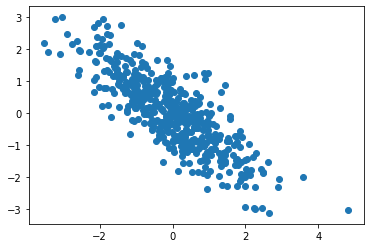

In [25]:
plt.scatter(correlated[:, 0], correlated[:, 1])